In [17]:
import tensorflow as tf
from IPython.display import clear_output
import itertools, re, os, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from pylab import rcParams
from tensorflow.keras.models import Sequential, save_model

from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization, Input, concatenate, Reshape, Conv2DTranspose, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras import layers, Input, Model, models, regularizers, optimizers

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

#from tensorflow.keras.utils import np_utils


from sklearn.utils import class_weight

import tensorflow_addons as tfa

from tensorflow.keras.layers import Conv1D, Convolution1D, MaxPooling1D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
import math

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.image as mpimg
import plotly.express as px
#from tensorflow.keras.utils.vis_utils import plot_model

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay


import math
import os
from tensorflow.keras import initializers
import gc
from random import randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Lambda
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
from functools import partial
from tensorflow.keras.models import load_model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.applications.resnet50 import ResNet50

def simp(x):
    return tf.keras.activations.sigmoid(x)

mask=[True,False,False,False,False]*8
maski=[True]
maski.extend(mask)
maski=maski*64
maski=maski*10
maski=np.array(maski)
maski=np.reshape(maski,(batch_size,8,8,41))

In [19]:
bce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

In [20]:
def my_loss_fn(y_true, y_pred):
    y_true = tf.reshape(y_true, (-1,individual_width,individual_height,41))
    y_pred = tf.reshape(y_pred, (-1,individual_width,individual_height,41))
    
    conf_loss1 = tf.reduce_sum(tf.square(y_true[:,:,:,:1]-y_pred[:,:,:,:1]))
    conf_loss2 = tf.reduce_sum(tf.square(y_true[:,:,:,1:2]-y_pred[:,:,:,1:2]))
    conf_loss3 = tf.reduce_sum(tf.square(y_true[:,:,:,6:7]-y_pred[:,:,:,6:7]))
    conf_loss4 = tf.reduce_sum(tf.square(y_true[:,:,:,11:12]-y_pred[:,:,:,11:12]))
    conf_loss5 = tf.reduce_sum(tf.square(y_true[:,:,:,16:17]-y_pred[:,:,:,16:17]))
    conf_loss6 = tf.reduce_sum(tf.square(y_true[:,:,:,21:22]-y_pred[:,:,:,21:22]))
    conf_loss7 = tf.reduce_sum(tf.square(y_true[:,:,:,26:27]-y_pred[:,:,:,26:27]))
    conf_loss8 = tf.reduce_sum(tf.square(y_true[:,:,:,31:32]-y_pred[:,:,:,31:32]))
    conf_loss9 = tf.reduce_sum(tf.square(y_true[:,:,:,36:37]-y_pred[:,:,:,36:37]))
    
    conf_loss = conf_loss1+conf_loss2+conf_loss3+conf_loss4+conf_loss5+conf_loss6+conf_loss7+conf_loss8+conf_loss9
    
    
    lodu_mask=tf.reshape(y_true[:,:,:,:1],(-1,individual_width,individual_height))
    modi_true = tf.boolean_mask(y_true[:,:,:,1:],lodu_mask)
    modi_pred = tf.boolean_mask(y_pred[:,:,:,1:],lodu_mask)
    modi_true = tf.reshape(modi_true,(-1,8,5))
    modi_pred = tf.reshape(modi_pred,(-1,8,5))
    
    modi_mask = tf.reshape(modi_true[:,:,:1],(-1,8))
    
    modi_box_true = tf.boolean_mask(modi_true[:,:,1:5],modi_mask)
    modi_box_pred = tf.boolean_mask(modi_pred[:,:,1:5],modi_mask)
    
    modi_box_true = tf.reshape(modi_box_true,(-1,4))
    modi_box_pred = tf.reshape(modi_box_pred,(-1,4))
    
    center_loss = tf.reduce_sum(tf.abs(modi_box_true[:,:2]-modi_box_pred[:,:2]))
    
    box_loss = tf.reduce_sum(tf.abs(modi_box_true[:,2:]-modi_box_pred[:,2:]))
    area_loss = tf.reduce_sum(tf.abs(tf.math.multiply(modi_box_true[:,2:3],modi_box_true[:,3:]) - tf.math.multiply(modi_box_pred[:,2:3],modi_box_pred[:,3:])))
    
    iou_loss = cal_iou(modi_box_true,modi_box_pred)
    
    conf_loss = conf_loss/(batch_size)
    center_loss = center_loss/batch_size
    box_loss = box_loss/batch_size
    iou_loss = iou_loss/(batch_size)
    area_loss = area_loss/batch_size
    
    sumi = (2.0*conf_loss)+(3.0*iou_loss)+(2.3*center_loss)+(1.8*box_loss)+(2.0*area_loss)
    return sumi

In [21]:
cce = tf.keras.losses.CategoricalCrossentropy()

In [22]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
user_credential = user_secrets.get_gcloud_credential()
user_secrets.set_tensorflow_credential(user_credential)

In [23]:
# Cloud AutoML
from google.cloud import automl_v1beta1 as automl
automl_client = automl.AutoMlClient()

# Cloud Translation
from google.cloud import translate_v2
translate_client = translate_v2.Client()

# Cloud Natural Language
from google.cloud import language_v1
client = language_v1.LanguageServiceClient()

# Cloud Video Intelligence
from google.cloud import videointelligence
video_client = videointelligence.VideoIntelligenceServiceClient()

# Cloud Vision
from google.cloud import vision
client = vision.ImageAnnotatorClient()

# Cloud Storage
from google.cloud import storage
storage_client = storage.Client(project='YOUR PROJECT ID')

# BigQuery
from google.cloud import bigquery
bigquery_client = bigquery.Client(project='YOUR PROJECT ID')

In [24]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    print("Device:", tpu.master())
    strategy = tf.distribute.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of replicas:", strategy.num_replicas_in_sync)

2021-11-28 05:36:14.955316: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2021-11-28 05:36:14.955389: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30064}
2021-11-28 05:36:14.960601: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2021-11-28 05:36:14.960677: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30064}


Device: grpc://10.0.0.2:8470
Number of replicas: 8


In [25]:
batch_size=32
image_size=800
sizei=6
each_sizei=8
total_sizei=64
channels_size=3
individual_width = 8
individual_height = 8

    
global no_of_anchors,no_of_classes,threshold, thresh_iou,max_box
no_of_anchors=each_sizei
no_of_classes=0
threshold=0.6
threshold_iou=0.3
max_box=50

In [26]:
def yolo_boxer_to_corners(box_xy, box_wh):
    box_mins = box_xy - (box_wh / 2.)
    box_maxes = box_xy + (box_wh/2.)
    return tf.keras.backend.concatenate([
        box_mins[:,0:1],  # y_min
        box_mins[:,1:2],  # x_min
        box_maxes[:,0:1],  # y_max
        box_maxes[:,1:2]  # x_max
    ])

def kali_iou(box1, box2):
    (box1_x1, box1_y1, box1_x2, box1_y2) = box1[:,:1],box1[:,1:2],box1[:,2:3],box1[:,3:4]
    (box2_x1, box2_y1, box2_x2, box2_y2) = box2[:,:1],box2[:,1:2],box2[:,2:3],box2[:,3:4]
    xi1 = tf.math.maximum(box1_x1,box2_x1)
    yi1 = tf.math.maximum(box1_y1,box2_y1)
    xi2 = tf.math.minimum(box1_x2,box2_x2)
    yi2 = tf.math.minimum(box1_y2,box2_y2)
    inter_width = tf.math.maximum(xi2-xi1,0)
    inter_height = tf.math.maximum(yi2-yi1,0)
    inter_area = inter_width*inter_height
    box1_area = tf.math.abs(box1_x2-box1_x1)*tf.math.abs(box1_y2-box1_y1)
    box2_area = tf.math.abs(box2_x2-box2_x1)*tf.math.abs(box2_y2-box2_y1)
    union_area = box1_area+box2_area-inter_area
    iou = inter_area/union_area
    return iou

def calci_loss(boxe):
    boxy=boxe*800
    boxew=tf.abs(boxe[:,2:3]-boxe[:,:1])
    boxeh=tf.abs(boxe[:,3:4]-boxe[:,1:2])
    dusi=(tf.ones_like(boxew))*800
    boxew=boxew-dusi
    boxeh=boxeh-dusi
    ducy=tf.keras.activations.relu(boxew/800)
    ducy1=tf.keras.activations.relu(boxeh/800)
    return tf.reduce_sum(ducy1)+tf.reduce_sum(ducy)

def cal_iou(original,pred):
    box_wh = original[:,2:]
    box_wh_pred = pred[:,2:]
    box_xy = original[:,:2]
    box_xy_pred = pred[:,:2]
    boxes_original = yolo_boxer_to_corners(box_xy,box_wh)
    boxes_pred = yolo_boxer_to_corners(box_xy_pred,box_wh_pred)
#     another_loss = calci_loss(boxes_pred)
    score = kali_iou(boxes_original,boxes_pred)
    usei = tf.ones_like(score)
    total_loss = tf.reduce_sum(bce(score,usei))
    return total_loss

**masks**

In [27]:
import os
from kaggle_datasets import KaggleDatasets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

plt.style.use('ggplot')

IMAGE_SIZE = [600, 420]

In [28]:
GCS_PATH = KaggleDatasets().get_gcs_path()

In [29]:
FILENAMES = tf.io.gfile.glob(GCS_PATH + "/tfrecords/*.tfrec")
split_ind = int(0.8 * len(FILENAMES))
TRAINING_FILENAMES, VALID_FILENAMES = FILENAMES[:split_ind], FILENAMES[split_ind:]
print("Train TFRecord Files:", len(TRAINING_FILENAMES))
print("Validation TFRecord Files:", len(VALID_FILENAMES))

Train TFRecord Files: 3
Validation TFRecord Files: 1


In [30]:
def parse_tfrecord_fn(example):
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "label": tf.io.VarLenFeature(tf.float32)
    }
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
    example["label"] = tf.sparse.to_dense(example["label"])
    return example


def prepare_sample(features):
    image = tf.image.resize(features["image"], size=(image_size, image_size))
    return image, features["label"]


def get_dataset(filenames, batch_size):
    dataset = (
        tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTOTUNE)
        .map(parse_tfrecord_fn, num_parallel_calls=AUTOTUNE)
        .map(prepare_sample, num_parallel_calls=AUTOTUNE)
        .map(data_augment, num_parallel_calls=AUTOTUNE)
        .shuffle(batch_size * 10)
        .batch(batch_size)
        .prefetch(AUTOTUNE)
    )
    return dataset


AUTOTUNE = tf.data.experimental.AUTOTUNE

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)


def data_augment(image, label):
    image = tf.image.random_saturation(image, 0, 2)
    image=tf.image.random_brightness(image, 0.1)
    return image, label  

In [31]:
STEPS_PER_EPOCH = count_data_items(TRAINING_FILENAMES)// batch_size
VALIDATION_STEPS = -(-count_data_items(VALID_FILENAMES) // batch_size)

2624
label: [0. 0. 0. ... 0. 0. 0.]
Image shape: (800, 800, 3)


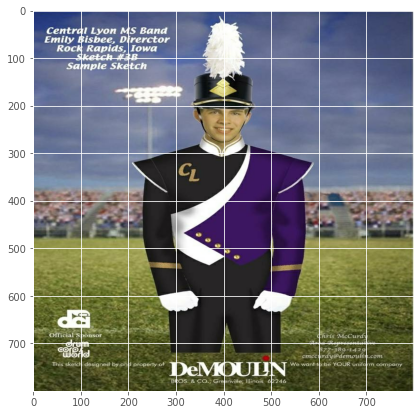

In [32]:
tfrecords_dir = GCS_PATH+'/tfrecords'
num_samples=5000
raw_dataset = tf.data.TFRecordDataset(f"{tfrecords_dir}/file_00-{num_samples}.tfrec")
parsed_dataset = raw_dataset.map(parse_tfrecord_fn)


for features in parsed_dataset.take(1):
    for key in features.keys():
        if key != "image":
            print(len(features[key]))
            print(f"{key}: {features[key]}")

    print(f"Image shape: {features['image'].shape}")
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy())
    plt.show()

In [33]:
def create_model():
    encoder_input = layers.Input(shape=(image_size, image_size, 3), name="original_img")
    pretrained_model = tf.keras.applications.InceptionResNetV2(input_shape=(image_size, image_size, 3),include_top=False,weights='imagenet',pooling='max')
    pretrained_model = Model(inputs=pretrained_model.inputs, outputs=pretrained_model.layers[-2].output)
    pretrained_model.trainable = True
#     for layer in pretrained_model.layers[len(pretrained_model.layers)-3:]:
#         layer.trainable = True
    x=pretrained_model(encoder_input)
    x=layers.BatchNormalization()(x)
    x = Conv2D(512, (7,7), strides=(1,1), padding='valid', name='conv_third_last',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',activation='relu')(x)
    x=layers.BatchNormalization()(x)
    x = Conv2D(128, (7,7), strides=(1,1), padding='valid', name='conv_second_last', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',activation='relu')(x)
    x=layers.BatchNormalization()(x)
    x = Conv2D(128, (3,3), strides=(1,1), padding='same', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros', name='relu',activation='relu')(x)
    x=layers.Dropout(0.1)(x)
    x=layers.BatchNormalization()(x)
    x = Conv2D(80, (3,3), strides=(1,1), padding='valid', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros', name='conv_last',activation='relu')(x)
    x=layers.BatchNormalization()(x)
    x=layers.Flatten()(x)
    encoder_output=layers.Dense(2624, activation='linear',kernel_initializer='glorot_uniform',bias_initializer='zeros')(x)
    encoder = Model(encoder_input, encoder_output, name="encoder")
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    encoder.compile(optimizer=opt,loss=my_loss_fn)
    return encoder

2021-11-28 05:36:24.574664: W ./tensorflow/core/distributed_runtime/eager/destroy_tensor_handle_node.h:57] Ignoring an error encountered when deleting remote tensors handles: Invalid argument: Unable to find the relevant tensor remote_handle: Op ID: 42, Output num: 1
Additional GRPC error information from remote target /job:worker/replica:0/task:0:
:{"created":"@1638077784.571235058","description":"Error received from peer ipv4:10.0.0.2:8470","file":"external/com_github_grpc_grpc/src/core/lib/surface/call.cc","file_line":1056,"grpc_message":"Unable to find the relevant tensor remote_handle: Op ID: 42, Output num: 1","grpc_status":3}


def create_model():
    encoder_input = layers.Input(shape=(image_size, image_size, 3), name="original_img")
    pretrained_model = tf.keras.applications.ResNet50(input_shape=(image_size, image_size, 3),include_top=False,weights='imagenet',pooling='max')
    pretrained_model = Model(inputs=pretrained_model.inputs, outputs=pretrained_model.layers[-2].output)
    pretrained_model.trainable = False
    for layer in pretrained_model.layers[len(pretrained_model.layers)-8:]:
        layer.trainable = True
    x=pretrained_model(encoder_input)
    x = Conv2D(512, (7,7), strides=(1,1), padding='valid', name='conv_third_last',use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform',activation='relu')(x)
    x=layers.Dropout(0.2)(x)
    x = Conv2D(128, (7,7), strides=(1,1), padding='valid', name='conv_second_last', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform',activation='relu')(x)
    x=layers.Dropout(0.1)(x)
    x = Conv2D(64, (5,5), strides=(1,1), padding='valid', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform', name='conv_last1')(x)
    x=layers.Dropout(0.1)(x)
    x = Conv2D(64, (5,5), strides=(1,1), padding='valid', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform', name='conv_last2')(x)
    x=layers.Dropout(0.1)(x)
    x = Conv2D(900, (5,5), strides=(1,1), padding='valid', use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='glorot_uniform', name='conv_last33')(x)
    x=layers.Dropout(0.1)(x)
    x=layers.Flatten()(x)
    encoder_output=layers.Dense(900, activation='linear',kernel_initializer='glorot_uniform',bias_initializer='zeros')(x)
    encoder = Model(encoder_input, encoder_output, name="encoder")
#     opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    encoder.compile(optimizer='adam',loss=my_loss_fn)
    return encoder

In [34]:
train=get_dataset(TRAINING_FILENAMES, batch_size).repeat()
valid=get_dataset(VALID_FILENAMES, batch_size).repeat()

In [35]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, patience=50)

# model = load_model('./todel.h5',custom_objects={ 'my_loss_fn': my_loss_fn })

with strategy.scope():
#     model = load_model('./todel.h5',custom_objects={ 'my_loss_fn': my_loss_fn })
    model = create_model()

history = model.fit(
    train,
    epochs=20,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=valid,
    validation_steps=VALIDATION_STEPS,
    callbacks=[es, mc],
    verbose=1
)

219062272/219055592 [==============================] - 1s 0us/step
Epoch 1/20
468/468 [==============================] - 379s 451ms/step - loss: 134.9116 - val_loss: 40.3182

Epoch 00001: val_loss improved from inf to 40.31817, saving model to best_model.h5
Epoch 2/20
468/468 [==============================] - 191s 409ms/step - loss: 84.3941 - val_loss: 41.2289

Epoch 00002: val_loss did not improve from 40.31817
Epoch 3/20
468/468 [==============================] - 192s 410ms/step - loss: 76.0432 - val_loss: 40.4990

Epoch 00003: val_loss did not improve from 40.31817
Epoch 4/20
468/468 [==============================] - 191s 409ms/step - loss: 73.9324 - val_loss: 2440.5483

Epoch 00004: val_loss did not improve from 40.31817
Epoch 5/20
468/468 [==============================] - 191s 408ms/step - loss: 73.0569 - val_loss: 1142.7664

Epoch 00005: val_loss did not improve from 40.31817
Epoch 6/20
468/468 [==============================] - 192s 411ms/step - loss: 71.2182 - val_loss: 40.4

In [36]:
history = model.fit(
    train,
    epochs=80,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=valid,
    validation_steps=VALIDATION_STEPS,
    callbacks=[es, mc],
    verbose=1
)

Epoch 1/80
468/468 [==============================] - 193s 412ms/step - loss: 64.2186 - val_loss: 52.5525

Epoch 00001: val_loss did not improve from 37.24805
Epoch 2/80
468/468 [==============================] - 194s 415ms/step - loss: 64.2276 - val_loss: 76.1997

Epoch 00002: val_loss did not improve from 37.24805
Epoch 3/80
468/468 [==============================] - 191s 408ms/step - loss: 63.9657 - val_loss: 1259.0391

Epoch 00003: val_loss did not improve from 37.24805
Epoch 4/80
468/468 [==============================] - 193s 412ms/step - loss: 63.8804 - val_loss: 37.4489

Epoch 00004: val_loss did not improve from 37.24805
Epoch 5/80
468/468 [==============================] - 191s 409ms/step - loss: 63.7595 - val_loss: 724.0357

Epoch 00005: val_loss did not improve from 37.24805
Epoch 6/80
468/468 [==============================] - 191s 407ms/step - loss: 63.5697 - val_loss: 36.7009

Epoch 00006: val_loss improved from 37.24805 to 36.70094, saving model to best_model.h5
Epoch 7

In [37]:
model.save('dodel.h5')

In [ ]:
history = model.fit(
    train,
    epochs=100,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=valid,
    validation_steps=VALIDATION_STEPS,
    callbacks=[es, mc],
    verbose=1
)

Epoch 1/100
468/468 [==============================] - 191s 406ms/step - loss: 54.7901 - val_loss: 13468870.0000

Epoch 00001: val_loss did not improve from 33.60103
Epoch 2/100
468/468 [==============================] - 190s 406ms/step - loss: 54.7441 - val_loss: 1706135.5000

Epoch 00002: val_loss did not improve from 33.60103
Epoch 3/100
468/468 [==============================] - 190s 407ms/step - loss: 54.8396 - val_loss: 401509.8125

Epoch 00003: val_loss did not improve from 33.60103
Epoch 4/100
468/468 [==============================] - 192s 411ms/step - loss: 54.6855 - val_loss: 30018.2891

Epoch 00004: val_loss did not improve from 33.60103
Epoch 5/100
468/468 [==============================] - 190s 406ms/step - loss: 54.5832 - val_loss: 22742358.0000

Epoch 00005: val_loss did not improve from 33.60103
Epoch 6/100
468/468 [==============================] - 196s 418ms/step - loss: 54.5174 - val_loss: 12320.4033

Epoch 00006: val_loss did not improve from 33.60103
Epoch 7/100
4